In [2]:
import os 
import nibabel as nb 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
%matplotlib inline

# yeo colors

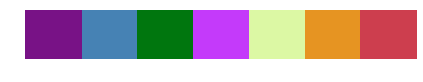

In [3]:
from matplotlib.colors import ListedColormap

convertYeo7 = [3,6,7,1,5,2,4]
cols7 = (#(255,255,255),
         (120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
yeoColors = ListedColormap(cols,name='colormapYeo')

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=yeoColors, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

# fsaverage

In [4]:
from nilearn import datasets
from nilearn.plotting.surf_plotting import load_surf_mesh

In [5]:
def return_fsaverage_data(freesurfer_dir, fsaverage_id):
    datadir = os.path.join(freesurfer_dir, fsaverage_id, 'surf')
    
    # fsaverage
    fsaverage = dict()
    fsaverage['infl_left']  = os.path.join(datadir, 'lh.inflated')
    fsaverage['infl_right'] = os.path.join(datadir, 'rh.inflated')
    fsaverage['pial_left']  = os.path.join(datadir, 'lh.pial')
    fsaverage['pial_right'] = os.path.join(datadir, 'rh.pial')
    fsaverage['sulc_left']  = os.path.join(datadir, 'lh.sulc')
    fsaverage['sulc_right'] = os.path.join(datadir, 'rh.sulc')
    
    return fsaverage

In [6]:
def return_fsaverage_parcellation(new_parcellation_dir, fsaverage_id, parcelation):
    parc = os.path.join(new_parcellation_dir, fsaverage_id, 'label', parcelation)
    parc_labels, parc_ctab, parc_names = nb.freesurfer.read_annot(parc)
    return parc_labels, parc_ctab, parc_names


In [7]:
parcellation_dir = '/data/pt_mar006/parcellation'
fsaverage        = return_fsaverage_data(parcellation_dir, 'fsaverage')
fsaverage

{'infl_left': '/data/pt_mar006/parcellation/fsaverage/surf/lh.inflated',
 'infl_right': '/data/pt_mar006/parcellation/fsaverage/surf/rh.inflated',
 'pial_left': '/data/pt_mar006/parcellation/fsaverage/surf/lh.pial',
 'pial_right': '/data/pt_mar006/parcellation/fsaverage/surf/rh.pial',
 'sulc_left': '/data/pt_mar006/parcellation/fsaverage/surf/lh.sulc',
 'sulc_right': '/data/pt_mar006/parcellation/fsaverage/surf/rh.sulc'}

In [8]:
mesh_left  = load_surf_mesh(fsaverage['pial_left'])
mesh_right = load_surf_mesh(fsaverage['pial_right'])

mesh_left[0].shape

(163842, 3)

In [9]:
new_parcellation_dir = '/data/pt_mar006/tmp/Yeo_JNeurophysiol11_FreeSurfer/'

DK_lh_labels, DK_lh_ctab, DK_lh_names = return_fsaverage_parcellation(parcellation_dir, 
                                                                      'fsaverage', 
                                                                      'lh.Yeo2011_7Networks_N1000.annot')
DK_rh_labels, DK_rh_ctab, DK_rh_names = return_fsaverage_parcellation(parcellation_dir, 
                                                                      'fsaverage', 
                                                                      'rh.Yeo2011_7Networks_N1000.annot')


# 7 yeo networks on the surface

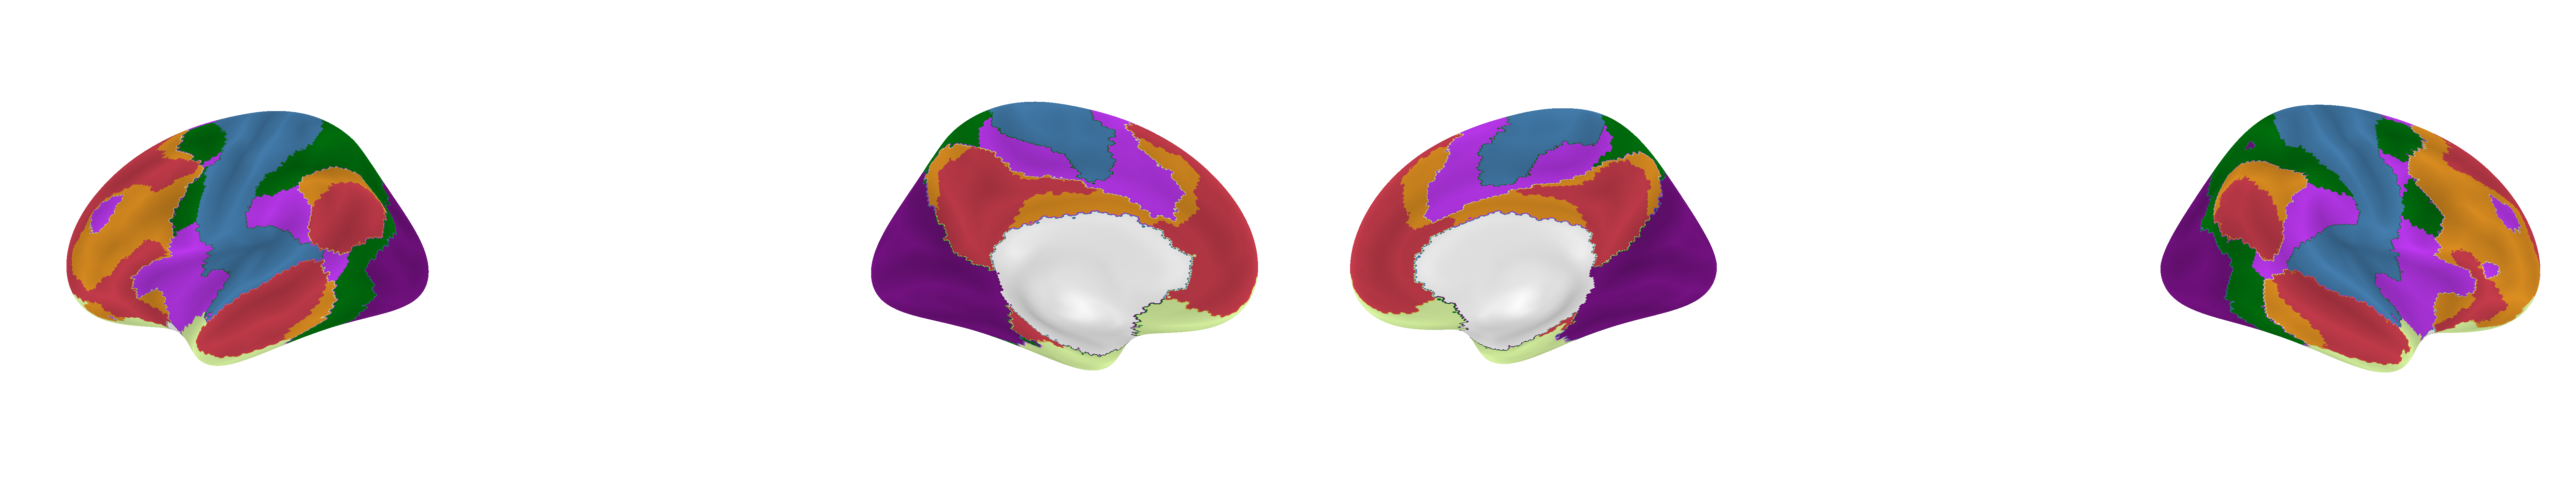

In [12]:
sns.set_style("whitegrid")
figure = plot_surf_inlf(fsaverage, DK_lh_labels, DK_rh_labels, 
                        cmap = yeoColors, vmin = 1.0, vmax = 7.0, alpha = 1)

# Labelling gradients with yeo networks

In [4]:
comp_file_01 = '/data/pt_mar006/subjects_group/mni3_component_1.nii.gz'
comp_file_02 = '/data/pt_mar006/subjects_group/mni3_component_2_reverse.nii.gz'
comp_file_03 = '/data/pt_mar006/subjects_group/mni3_component_3_reverse.nii.gz'

image_mask = os.path.join('/data/pt_mar006/subjects_group',
                          'mni3_rest_gm_mask.nii.gz')

gm_mask = nb.load(image_mask).get_data()
x    = np.where(gm_mask==1)[0]
y    = np.where(gm_mask==1)[1]
z    = np.where(gm_mask==1)[2]

comp_01     = np.array(nb.load(comp_file_01).get_data())
comp_02     = np.array(nb.load(comp_file_02).get_data())
comp_03     = np.array(nb.load(comp_file_03).get_data())

cmp_01_array = comp_01[x,y,z]
cmp_02_array = comp_02[x,y,z]
cmp_03_array = comp_03[x,y,z]

# Gradient 1 & 3

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

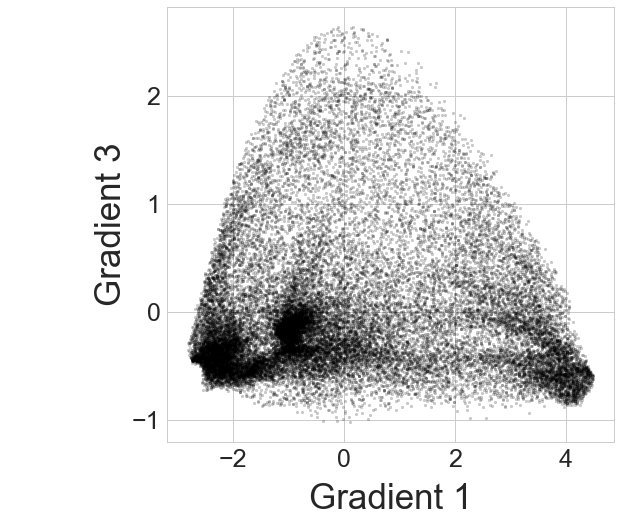

In [6]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")

figure = plt.figure(figsize=(8,8), facecolor='w')

ax     = figure.gca()
ax.patch.set_facecolor('white')

xLabel = ax.set_xlabel('\nGradient 1', linespacing=0, fontsize=35)
yLabel = ax.set_ylabel('\nGradient 3', linespacing=3.1, fontsize=35)

ax.scatter(cmp_01_array, cmp_03_array, 
           s = 30,
           c = 'k',
           alpha = 0.2,
           marker = '.',)


In [16]:
from nilearn import datasets

atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
atlas_yeo_file = atlas_yeo_2011.thick_7

A = nb.load(atlas_yeo_file).get_data()

tmp = np.array(A)
tmp = tmp[:,:,:,0]

print atlas_yeo_file
print tmp.shape

/home/raid/bayrak/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz
(256, 256, 256)


In [17]:
######resampling to mni (3mm)
from nilearn.image import resample_img

template_file = atlas_yeo_file
template      = nb.load(template_file)

myfile        = '/data/pt_mar006/subjects_group/MNI152_T1_3mm_brain.nii.gz'
mymap         = nb.load(myfile)

mysampled = resample_img(template_file,
                         target_affine = mymap.affine,
                         target_shape  = mymap.shape)

mysampled.to_filename('/data/pt_mar006/subjects_group/yeo_7_mni3mm.nii.gz')


In [7]:
B = nb.load('/data/pt_mar006/subjects_group/yeo_7_mni3mm.nii.gz').get_data()
tmp_B = B[:,:,:,0]
tmp_B.shape

(61, 73, 61)

In [8]:
np.where(tmp_B == 0)[0].shape

(147442,)

In [9]:
np.where(tmp_B == 1)[0].shape

(6582,)

In [10]:
np.where(tmp_B == 7)[0].shape

(8962,)

In [11]:
gm_mask = nb.load(image_mask).get_data()
x    = np.where(gm_mask==1)[0]
y    = np.where(gm_mask==1)[1]
z    = np.where(gm_mask==1)[2]


(array([7177., 4430., 4347., 3307., 3275.,  461., 4206., 6124.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ],
       dtype=float32),
 <a list of 8 Patch objects>)

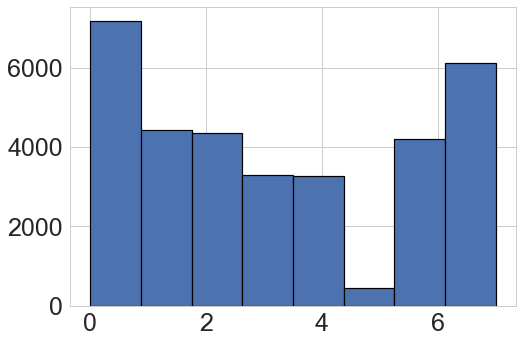

In [12]:
plt.hist(tmp_B[x,y,z], bins=8, edgecolor='black', linewidth=1.2)

In [13]:
yeolabels = tmp_B[x,y,z]

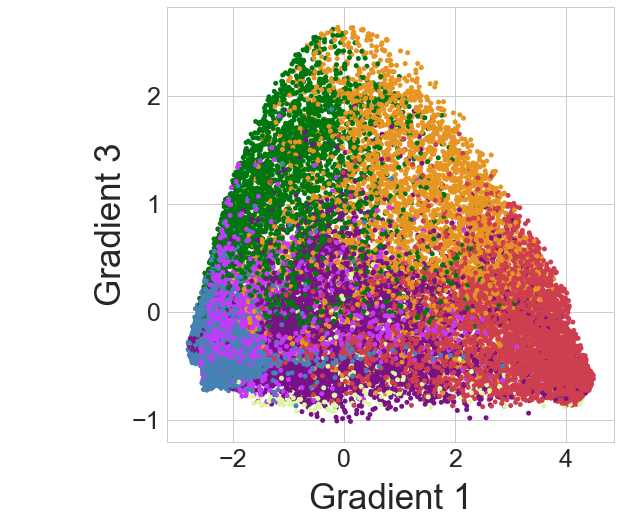

In [14]:
figure = plt.figure(figsize=(8,8), facecolor='w')

ax     = figure.gca()
ax.patch.set_facecolor('white')

xLabel = ax.set_xlabel('\nGradient 1', linespacing=0, fontsize=35)
yLabel = ax.set_ylabel('\nGradient 3', linespacing=3.1, fontsize=35)


ax.scatter(cmp_01_array, cmp_03_array, 
           s = 100,
           c = yeolabels,
           cmap = yeoColors,
           vmin=  1.0,
           vmax = 7.0,
           alpha = 1,
           linewidth = 0,
           marker = '.',)


# kde-distribution of lesioned-voxels along Gradient 1

In [15]:
def get_lesion_loc(comp_file,
                   gm_file,
                   les_file):

    COMP     = np.array(nb.load(comp_file).get_data())

    gm_mask = nb.load(gm_file).get_data()
    x    = np.where(gm_mask==1)[0]
    y    = np.where(gm_mask==1)[1]
    z    = np.where(gm_mask==1)[2]

    # where would be the lesion along the component
    lesion = np.array(nb.load(les_file).get_data())
    x_le   = np.where(lesion==1)[0]
    y_le   = np.where(lesion==1)[1]
    z_le   = np.where(lesion==1)[2]

    lesion_loc = COMP[x_le, y_le, z_le]

    return lesion_loc

In [16]:
list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()

data_dir     = '/data/pt_mar006/subjects_masks/'

image_mask = os.path.join('/data/pt_mar006/subjects_group',
                          'mni3_rest_gm_mask.nii.gz')

gm_mask = nb.load(image_mask).get_data()
x    = np.where(gm_mask==1)[0]
y    = np.where(gm_mask==1)[1]
z    = np.where(gm_mask==1)[2]

In [17]:
comp_file_01 = os.path.join('/data/pt_mar006/subjects_group',
                            'mni3_component_1.nii.gz')
COMP_01      = np.array(nb.load(comp_file_01).get_data())
comp_vec_01  = COMP_01[x,y,z]
bin_num      = 20

bins_hard_01 = np.linspace(comp_vec_01.min(), comp_vec_01.max(), 
                           bin_num+1)
print bins_hard_01

les_loc_01 = np.zeros((1))
for subject_id in subject_list:
    gm_file     = os.path.join(data_dir, subject_id, 
                               'gm_mask_no_lesion.nii.gz')
    les_file    = os.path.join(data_dir, subject_id, 
                               'lesion_mask_mni_dilated_gm.nii.gz')
    les_loc_tmp = get_lesion_loc(comp_file_01,
                                 gm_file,
                                 les_file)
    les_loc_01 = np.append(les_loc_01, les_loc_tmp)

print len(les_loc_01)

tmp_01 = []
for i in range(len(les_loc_01)):
    for j in range(len(bins_hard_01)):
        if bins_hard_01[j]<les_loc_01[i] and les_loc_01[i]<bins_hard_01[j+1]:
            tmp_01.append(j)

x_01  = np.array(tmp_01)
#x_01

[-2.8194961  -2.45357792 -2.08765974 -1.72174157 -1.35582339 -0.98990521
 -0.62398703 -0.25806885  0.10784933  0.4737675   0.83968568  1.20560386
  1.57152204  1.93744022  2.3033584   2.66927657  3.03519475  3.40111293
  3.76703111  4.13294929  4.49886746]
2435


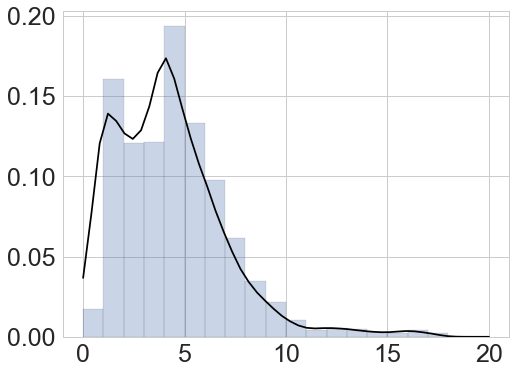

In [19]:
from scipy import stats
N    = 20
bins = np.arange(N+1)

fig, ax = plt.subplots(figsize=(8,6))

kde_01  = stats.gaussian_kde(x_01)
xxx_01  = np.linspace(0, N, )

ax.hist(x_01, normed=True, bins=bins, edgecolor='black', alpha=0.3)
ax.plot(xxx_01, kde_01(xxx_01),  'k')

# kde-distribution of lesioned-voxels along Gradient 2


In [20]:
comp_file_02 = os.path.join('/data/pt_mar006/subjects_group',
                            'mni3_component_2_reverse.nii.gz')
COMP_02      = np.array(nb.load(comp_file_02).get_data())
comp_vec_02  = COMP_02[x,y,z]
bin_num      = 20

bins_hard_02 = np.linspace(comp_vec_02.min(), comp_vec_02.max(), 
                           bin_num+1)
print bins_hard_02

les_loc_02 = np.zeros((1))

for subject_id in subject_list:
    gm_file     = os.path.join(data_dir, subject_id, 
                               'gm_mask_no_lesion.nii.gz')
    les_file    = os.path.join(data_dir, subject_id, 
                               'lesion_mask_mni_dilated_gm.nii.gz')
    les_loc_tmp = get_lesion_loc(comp_file_02,
                                 gm_file,
                                 les_file)
    les_loc_02 = np.append(les_loc_02, les_loc_tmp)

print len(les_loc_02)

tmp_02 = []
for i in range(len(les_loc_02)):
    for j in range(len(bins_hard_02)):
        if bins_hard_02[j]<les_loc_02[i] and les_loc_02[i]<bins_hard_02[j+1]:
            tmp_02.append(j)

x_02  = np.array(tmp_02)
x_02

[-2.07143131 -1.80885576 -1.54628022 -1.28370467 -1.02112912 -0.75855357
 -0.49597803 -0.23340248  0.02917307  0.29174862  0.55432416  0.81689971
  1.07947526  1.3420508   1.60462635  1.8672019   2.12977745  2.39235299
  2.65492854  2.91750409  3.18007964]
2435


array([ 7, 10, 10, ..., 18, 17, 16])

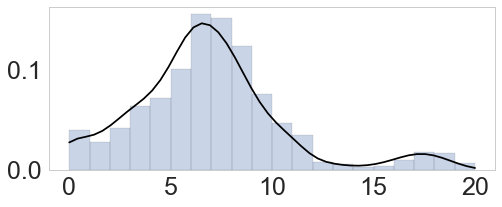

In [21]:
from scipy import stats
N    = 20
bins = np.arange(N+1)

fig, ax = plt.subplots(figsize=(8,3))

kde_02  = stats.gaussian_kde(x_02)
xxx_02  = np.linspace(0, N, )

ax.hist(x_02, normed=True, bins=bins, edgecolor='black', alpha=0.3)
ax.plot(xxx_02, kde_02(xxx_02), 'k')
ax.grid(False)


# kde-distribution of lesioned-voxels along Gradient 3


In [22]:
comp_file_03 = os.path.join('/data/pt_mar006/subjects_group',
                            'mni3_component_3_reverse.nii.gz')
COMP_03      = np.array(nb.load(comp_file_03).get_data())
comp_vec_03  = COMP_03[x,y,z]
bin_num      = 20

bins_hard_03 = np.linspace(comp_vec_03.min(), comp_vec_03.max(), 
                           bin_num+1)
print bins_hard_03

les_loc_03 = np.zeros((1))
for subject_id in subject_list:
    gm_file     = os.path.join(data_dir, subject_id, 
                               'gm_mask_no_lesion.nii.gz')
    les_file    = os.path.join(data_dir, subject_id, 
                               'lesion_mask_mni_dilated_gm.nii.gz')
    les_loc_tmp = get_lesion_loc(comp_file_03,
                                 gm_file,
                                 les_file)
    les_loc_03 = np.append(les_loc_03, les_loc_tmp)

print len(les_loc_03)

tmp_03 = []
for i in range(len(les_loc_03)):
    for j in range(len(bins_hard_03)):
        if bins_hard_03[j]<les_loc_03[i] and les_loc_03[i]<bins_hard_03[j+1]:
            tmp_03.append(j)

x_03  = np.array(tmp_03)
#x_03

[-1.01576385 -0.83321024 -0.65065663 -0.46810302 -0.2855494  -0.10299579
  0.07955782  0.26211143  0.44466504  0.62721866  0.80977227  0.99232588
  1.17487949  1.3574331   1.53998671  1.72254033  1.90509394  2.08764755
  2.27020116  2.45275477  2.63530839]
2435


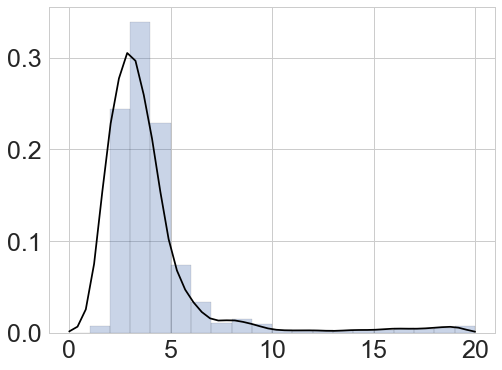

In [23]:
N    = 20
bins = np.arange(N+1)

fig, ax = plt.subplots(figsize=(8,6))
ax.patch.set_facecolor('white')
kde_03  = stats.gaussian_kde(x_03)
xxx_03  = np.linspace(0, N, )

ax.hist(x_03, normed=True, bins=bins, edgecolor='black',alpha=0.3)
ax.plot(xxx_03, kde_03(xxx_03), 'k')

# # combine all figures

# Gradient 1 & 3

/data/u_bayrak_software/anaconda2/envs/viz27/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/data/u_bayrak_software/anaconda2/envs/viz27/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


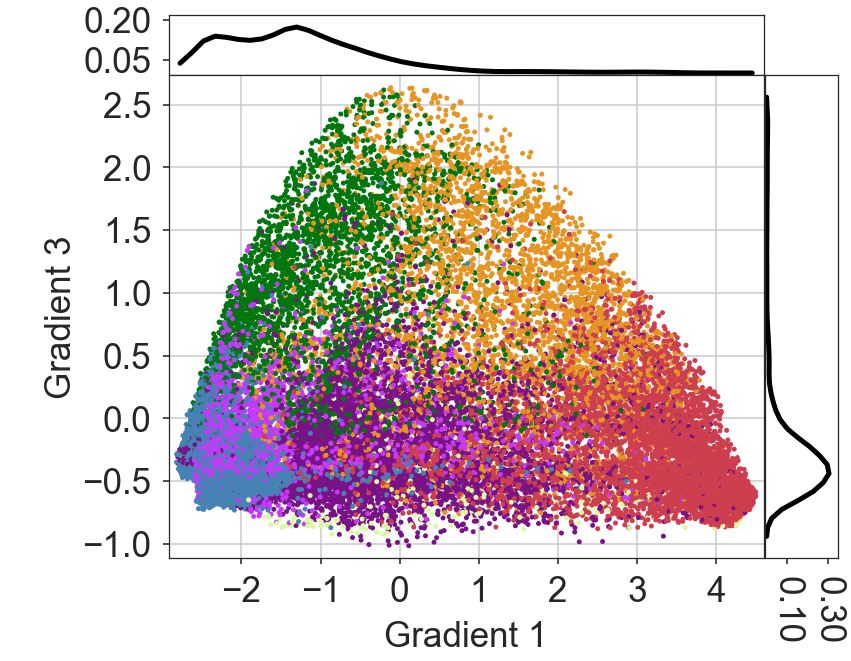

In [24]:
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")
sns.set_style("ticks")

fig = plt.figure(1, figsize=(12, 10))

gs = gridspec.GridSpec(9, 9)
gs.update(wspace=0.02, hspace=0.01)

ax1 = plt.subplot(gs[0, :-1])
ax2 = plt.subplot(gs[1:, :-1])
ax3 = plt.subplot(gs[1:, -1])

ax1.plot(xxx_01, kde_01(xxx_01), 
         'k', linewidth=5)

ax1.grid(False)
ax1.set_xlim(bins.min()-0.4, bins.max()+0.4)
ax1.set_ylim(-0.006, 0.22)
ax1.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off')

ax1.set_yticks([0.05,  0.2])
ax1.set_yticklabels(["%.2f" % member for member in [0.05, 0.20]] , fontsize=35)

ax2.scatter(cmp_01_array, cmp_03_array, 
           s = 100,
           c = yeolabels,
           cmap = yeoColors,
           vmin=  1.0,
           vmax = 7.0,
           alpha = 1,
           linewidth = 0,
           marker = '.',)
ax2.set_xticks([-2, -1, 0, 1, 2, 3, 4])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])

ax2.grid(True)
ax2.set_xlabel('\nGradient 1', linespacing=0.05, fontsize=35)
ax2.set_ylabel('\nGradient 3', fontsize=35)
ax2.set_xlim(cmp_01_array.min()-0.1, cmp_01_array.max()+0.1)
ax2.set_ylim(cmp_03_array.min()-0.1, cmp_03_array.max()+0.1)
ax2.tick_params(axis='both', which='major', labelsize=35)


ax3.plot(kde_03(xxx_03), xxx_03, 
         'k', linewidth=5)
ax3.grid(False)
ax3.set_yticks([])
ax3.set_xticks([0.1,  0.3])
ax3.set_xticklabels(["%.2f" % member for member in [0.1,  0.3]], rotation=270, fontsize=35)
ax3.set_xlim(-0.006, 0.35)

plt.tight_layout()


In [33]:
#fig.savefig('/data/pt_mar006/figures/grads_yeo_low_1_3.png',
#            dpi=150, format='png', bbox_inches='tight')

# Gradient 1 & 2

(-0.006, 0.16)

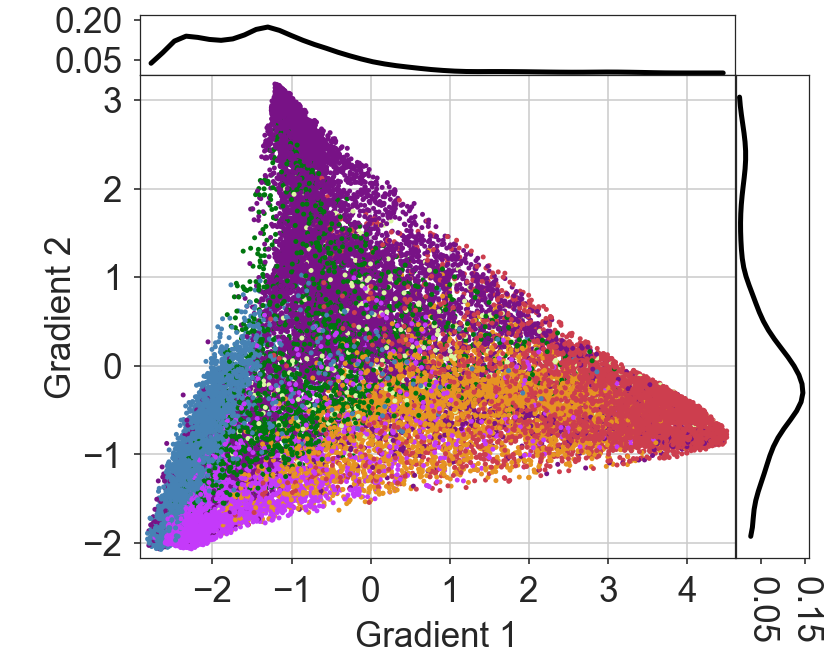

In [25]:
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")
sns.set_style("ticks")

fig = plt.figure(1, figsize=(12, 10))

gs = gridspec.GridSpec(9, 9)
gs.update(wspace=0.02, hspace=0.01)

ax1 = plt.subplot(gs[0, :-1])
ax2 = plt.subplot(gs[1:, :-1])
ax3 = plt.subplot(gs[1:, -1])

ax1.plot(xxx_01, kde_01(xxx_01), 
         'k', linewidth=5)

ax1.grid(False)
ax1.set_xlim(bins.min()-0.4, bins.max()+0.4)
ax1.set_ylim(-0.006, 0.22)
ax1.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off')

ax1.set_yticks([0.05,  0.2])
ax1.set_yticklabels(["%.2f" % member for member in [0.05, 0.20]] , fontsize=35)

ax2.scatter(cmp_01_array, cmp_02_array, 
           s = 100,
           c = yeolabels,
           cmap = yeoColors,
           vmin=  1.0,
           vmax = 7.0,
           alpha = 1,
           linewidth = 0,
           marker = '.',)
ax2.set_xticks([-2, -1, 0, 1, 2, 3, 4])

ax2.grid(True)
ax2.set_xlabel('\nGradient 1', linespacing=0.05, fontsize=35)
ax2.set_ylabel('\nGradient 2', fontsize=35)
ax2.set_xlim(cmp_01_array.min()-0.1, cmp_01_array.max()+0.1)
ax2.set_ylim(cmp_02_array.min()-0.1, cmp_02_array.max()+0.1)
ax2.tick_params(axis='both', which='major', labelsize=35)

ax3.plot(kde_02(xxx_02), xxx_02, 
         'k', linewidth=5)
ax3.grid(False)
ax3.set_yticks([])
ax3.set_xticks([0.05,  0.15])
ax3.set_xticklabels(["%.2f" % member for member in [0.05,  0.15]], rotation=270, fontsize=35)
ax3.set_xlim(-0.006, 0.16)


In [26]:
fig.savefig('/data/pt_mar006/figures/grads_yeo_high_1_2.png',
            dpi=600, format='png', bbox_inches='tight')

# Gradient 2 & 3

(-0.006, 0.16)

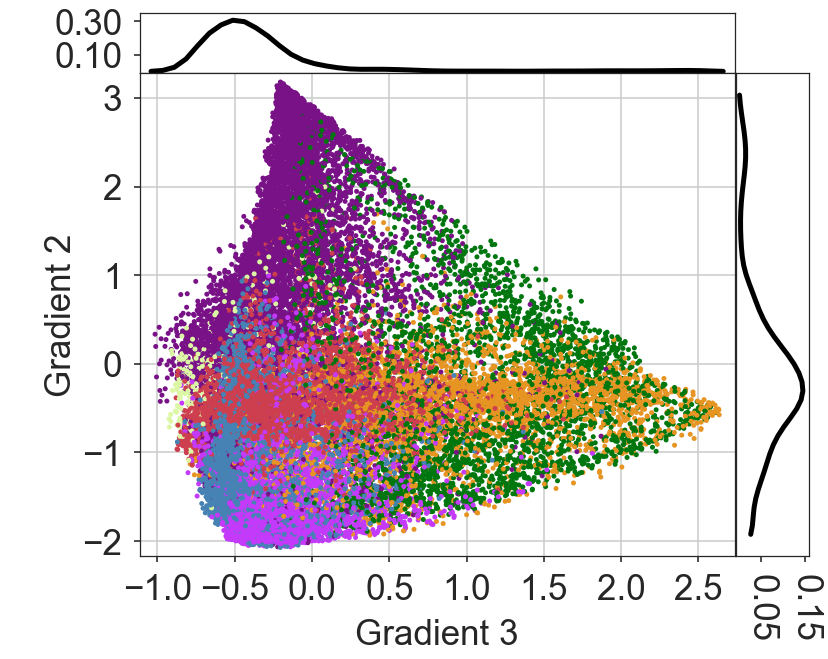

In [27]:
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")
sns.set_style("ticks")

fig = plt.figure(1, figsize=(12, 10))

gs = gridspec.GridSpec(9, 9)
gs.update(wspace=0.02, hspace=0.01)

ax1 = plt.subplot(gs[0, :-1])
ax2 = plt.subplot(gs[1:, :-1])
ax3 = plt.subplot(gs[1:, -1])

ax2.scatter(cmp_03_array, cmp_02_array, 
           s = 100,
           c = yeolabels,
           cmap = yeoColors,
           vmin=  1.0,
           vmax = 7.0,
           alpha = 1,
           linewidth = 0,
           marker = '.',)

ax2.grid(True)
ax2.set_xlabel('\nGradient 3', linespacing=0.05, fontsize=35)
ax2.set_ylabel('\nGradient 2', fontsize=35)
ax2.set_xlim(cmp_03_array.min()-0.1, cmp_03_array.max()+0.1)
ax2.set_ylim(cmp_02_array.min()-0.1, cmp_02_array.max()+0.1)
ax2.tick_params(axis='both', which='major', labelsize=35)
ax2.set_xticks([-1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5])
ax2.set_yticks([-2.0, -1.0, 0, 1, 2, 3])


ax1.plot(xxx_03, kde_03(xxx_03), 
         'k', linewidth=5)

ax1.grid(False)
ax1.set_xlim(bins.min()-0.4, bins.max()+0.4)

ax1.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom='off',      # ticks along the bottom edge are off
                top='off',         # ticks along the top edge are off
                labelbottom='off')

ax1.set_xticks([])
ax1.set_yticks([0.1,  0.3])
ax1.set_yticklabels(["%.2f" % member for member in [0.1,  0.3]], rotation=0, fontsize=35)
ax1.set_ylim(-0.006, 0.35)

ax3.plot(kde_02(xxx_02), xxx_02, 
         'k', linewidth=5)
ax3.grid(False)
ax3.set_yticks([])
ax3.set_xticks([0.05,  0.15])
ax3.set_xticklabels(["%.2f" % member for member in [0.05,  0.15]], rotation=270, fontsize=35)
ax3.set_xlim(-0.006, 0.16)



In [29]:
fig.savefig('/data/pt_mar006/figures/grads_yeo_high_2_3.png',
            dpi=600, format='png', bbox_inches='tight')

In [11]:
def plot_surf_inlf(fsaverage, surf_map_l, surf_map_r,
              threshold=None,  alpha=0.7, cmap='hot', vmin = None, vmax = None,
              bg_on_data = 1, output_file=None,
                  ):
    
    # Import libraries
    import nibabel
    import numpy as np
    import matplotlib.pyplot as plt

    from mpl_toolkits.mplot3d import Axes3D
    from nibabel import gifti

    from nilearn._utils.compat import _basestring
    from nilearn.plotting.img_plotting import _get_colorbar_and_data_ranges
    from nilearn.plotting.surf_plotting import load_surf_data, load_surf_mesh


    # load mesh and derive axes limits
    mesh_left = load_surf_mesh(fsaverage['infl_left'])
    mesh_right = load_surf_mesh(fsaverage['infl_right'])

    coords_left, faces_left = mesh_left[0], mesh_left[1]
    coords_right, faces_right = mesh_right[0], mesh_right[1]

    #limits = [-65, 33]
    limits =  [-150, 50]

    avg_method = 'mean'
    darkness = 0.3

    # if no cmap is given, set to matplotlib default
    if cmap is None:
        cmap = plt.cm.get_cmap(plt.rcParamsDefault['image.cmap'])
    else:
        # if cmap is given as string, translate to matplotlib cmap
        if isinstance(cmap, _basestring):
            cmap = plt.cm.get_cmap(cmap)

    def subplot(surf_map, bg_map, subplot_id, coords, faces, elev, azim, vmin=vmin, vmax=vmax, bg_on_data= bg_on_data):

        ax = fig.add_subplot(subplot_id, projection='3d', xlim=limits, ylim=limits)
        ax.view_init(elev=elev, azim=azim)
        ax.set_axis_off()
        p3dcollec = ax.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0.,
                                    antialiased=False, color='red')

        # If depth_map and/or surf_map are provided, map these onto the surface
        # set_facecolors function of Poly3DCollection is used as passing the
        # facecolors argument to plot_trisurf does not seem to work
        if bg_map is not None or surf_map is not None:

            face_colors = np.ones((faces.shape[0], 4))
            # face_colors[:, :3] = .5*face_colors[:, :3]  # why this?

            if bg_map is not None:
                bg_data = load_surf_data(bg_map)
                if bg_data.shape[0] != coords.shape[0]:
                    raise ValueError('The bg_map does not have the same number '
                                     'of vertices as the mesh.')
                bg_faces = np.mean(bg_data[faces], axis=1)
                bg_faces = bg_faces - bg_faces.min()
                bg_faces = bg_faces / bg_faces.max()
                # control background darkness
                bg_faces *= darkness
                face_colors = plt.cm.gray_r(bg_faces)

            # modify alpha values of background
            face_colors[:, 3] = alpha * face_colors[:, 3]
            # should it be possible to modify alpha of surf data as well?

            if surf_map is not None:
                surf_map_data = surf_map  # load_surf_data(surf_map)
                if len(surf_map_data.shape) is not 1:
                    raise ValueError('surf_map can only have one dimension but has'
                                     '%i dimensions' % len(surf_map_data.shape))
                if surf_map_data.shape[0] != coords.shape[0]:
                    raise ValueError('The surf_map does not have the same number '
                                     'of vertices as the mesh.')

                # create face values from vertex values by selected avg methods
                if avg_method == 'mean':
                    surf_map_faces = np.mean(surf_map_data[faces], axis=1)
                elif avg_method == 'median':
                    surf_map_faces = np.median(surf_map_data[faces], axis=1)

                # if no vmin/vmax are passed figure them out from data
                if vmin is None:
                    vmin = np.nanmin(surf_map_faces)
                if vmax is None:
                    vmax = np.nanmax(surf_map_faces)

                # treshold if inidcated
                if threshold is None:
                    kept_indices = np.where(surf_map_faces)[0]
                else:
                    kept_indices = np.where(np.abs(surf_map_faces) >= threshold)[0]

                surf_map_faces = surf_map_faces - vmin
                surf_map_faces = surf_map_faces / (vmax - vmin)

                # multiply data with background if indicated
                if bg_on_data:
                    face_colors[kept_indices] = cmap(surf_map_faces[kept_indices]) \
                                                * face_colors[kept_indices]
                else:
                    face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])

            p3dcollec.set_facecolors(face_colors)

    fig = plt.figure(figsize=(105,20))

    subplot(surf_map_l, fsaverage['sulc_left'], 141, coords_left, faces_left, elev=0, azim=180, bg_on_data= bg_on_data)
    subplot(surf_map_l, fsaverage['sulc_left'], 142, coords_left, faces_left, elev=0, azim=0, bg_on_data= bg_on_data)
    subplot(surf_map_r, fsaverage['sulc_right'], 143, coords_right, faces_right, elev=0, azim=180, bg_on_data= bg_on_data)
    subplot(surf_map_r, fsaverage['sulc_right'], 144, coords_right, faces_right, elev=0, azim=0, bg_on_data= bg_on_data)

    plt.tight_layout()
    
    # save figure if output file is given
    if output_file is not None:
        fig.savefig(output_file)
        plt.close(fig)
        
    return fig